<small><i>September 2014 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and license info are in the folder.</i></small>

In order to export to pdf 

+ Make sure you got pandoc installed (http://http://johnmacfarlane.net/pandoc/)
+ run ipython nbconvert

    ipython nbconvert --to latex --post PDF PIM_1.ipynb

#Image processing basics

Let us load an image and check the representation. 

In [1]:
%matplotlib inline

In [2]:
from skimage import io

image = io.imread('./neighborhood6.jpg')

In [3]:
image.shape

(536, 784, 3)

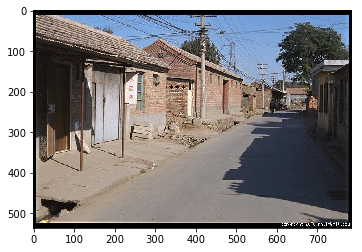

In [5]:
import matplotlib.pyplot as plt

fig=plt.figure()
plt.imshow(image)

In [7]:
print(image[0,0,0])

0


In [10]:
#Let us check the value of the first pixel
print (image[0,0,:])

import numpy as np
print ('Maximum value in all the image '+str(np.max(image)))
print ('Minimum value in all the image '+str(np.min(image)))

[0 0 0]
Maximum value in all the image 255
Minimum value in all the image 0


In [11]:
#Another viewer

import skimage.viewer as viewer
v=viewer.ImageViewer(image)
v.show()

C:\Users\XKK\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


[]

We can index the channels and show them separately

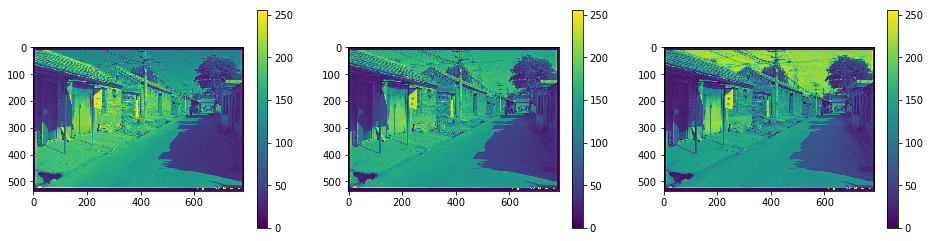

In [12]:
import matplotlib.pyplot as plt

fig=plt.figure()
plt.subplot(1,3,1)
plt.imshow(image[:,:,0])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(image[:,:,1])
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(image[:,:,2])
plt.colorbar()
ax = fig.gca()
fig.set_size_inches((16,4))


Let us try to identify which channel is which

The last one seems Blue, it has the max intensity on the sky.
The first one seem red and the second green.
Let us check this through

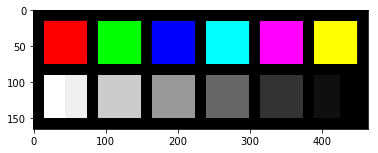

In [13]:
from skimage import io

image = io.imread('./color_check.jpg')

import matplotlib.pyplot as plt

fig=plt.figure()
plt.imshow(image)

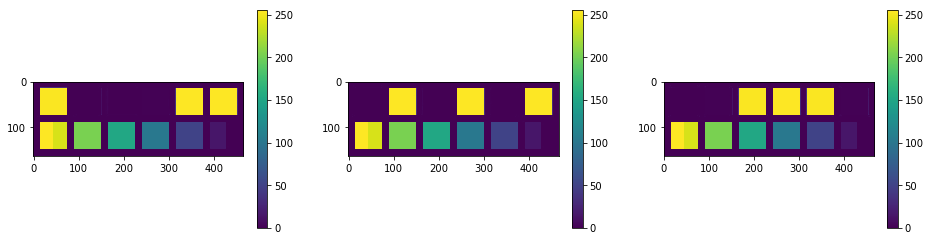

In [14]:
import matplotlib.pyplot as plt

fig=plt.figure()
plt.subplot(1,3,1)
plt.imshow(image[:,:,0])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(image[:,:,1])
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(image[:,:,2])
plt.colorbar()
ax = fig.gca()
fig.set_size_inches((16,4))

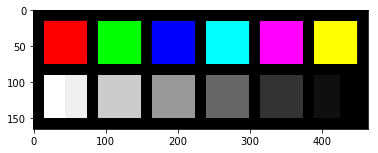

In [15]:
plt.imshow(image)

We can see several interesting effects. The pure colors, the combination of two colors, additive combination versus substractive combination, the representation of gray values.

Let us go back to our original image and check the concepts of sampling and quantization.

In [16]:
from skimage import io

image = io.imread('./neighborhood6.jpg')

In [17]:
image.shape

(536, 784, 3)

In [18]:
im_sampled = image[::2,::2,:]
im_sampled.shape


(268, 392, 3)

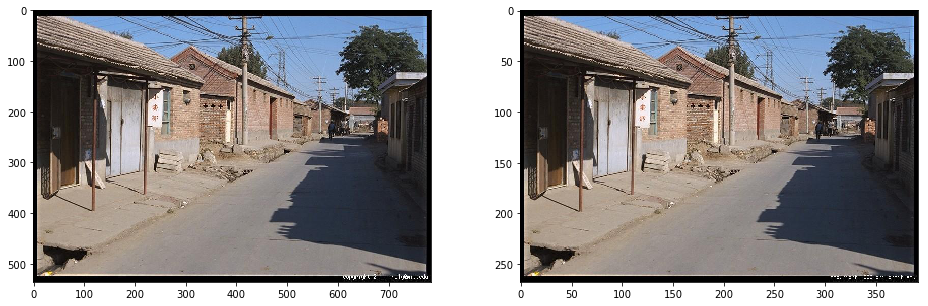

In [19]:
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(image,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(im_sampled,interpolation='nearest')
fig.set_size_inches((16,5))


In [20]:
im_sampled = image[::8,::8,:]
im_sampled.shape

(67, 98, 3)

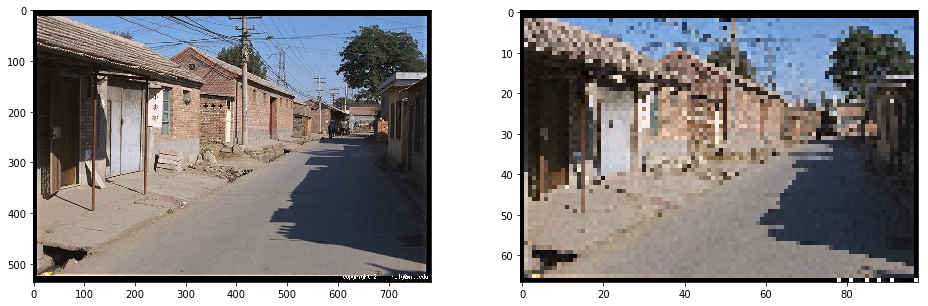

In [21]:
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(image,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(im_sampled,interpolation='nearest')
fig.set_size_inches((16,5))


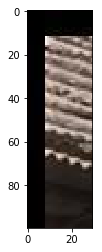

In [22]:
im = image[0:100,0:30,:]
plt.imshow(im)

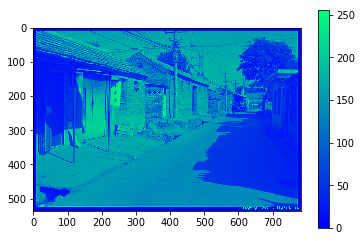

In [23]:
import numpy as np
imgray = np.mean(image,2)

plt.imshow(imgray.astype('uint8'),cmap="winter")
plt.colorbar()


63.75
286.875


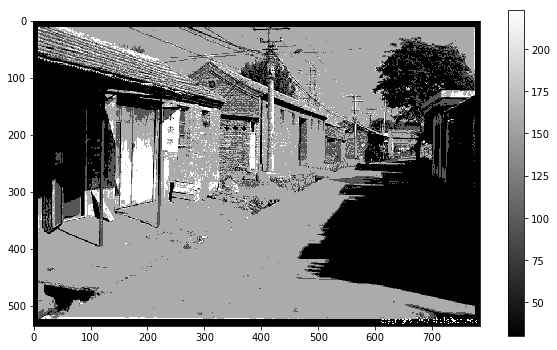

In [25]:
#Quantization of a gray image
imgray = np.sum(image,2)/3

Nlevels=4
THR = 255./(Nlevels)
print (THR)
imQ = np.floor(imgray/THR)*THR+THR/2
print (np.max(imQ))
plt.imshow(imQ.astype('uint8'),cmap="gray")
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches((10,6))